In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('House price prediction.csv')

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 503.3 KB


# Data Preprocessing

In [14]:
#1.Handling the datetime column
df['date']=pd.to_datetime(df['date'])

In [16]:
#2.Dropping unnecessary columns
df =df.drop(['street', 'city', 'statezip', 'country'], axis=1)

In [24]:
#3.Handling missing values
print(df.isnull().sum())
df.fillna(0, inplace=True)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64


In [26]:
#4.Feature Engineering
df['age of the house'] = df['date'].dt.year - df['yr_built']
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df.drop(['yr_built', 'yr_renovated'], axis = 1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,age of the house,renovated
0,2014-05-02,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,59,1
1,2014-05-02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,93,0
2,2014-05-02,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,48,0
3,2014-05-02,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,51,0
4,2014-05-02,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,60,1
4596,2014-07-09,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,31,1
4597,2014-07-09,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,5,0
4598,2014-07-10,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,40,0


# Data Visualization

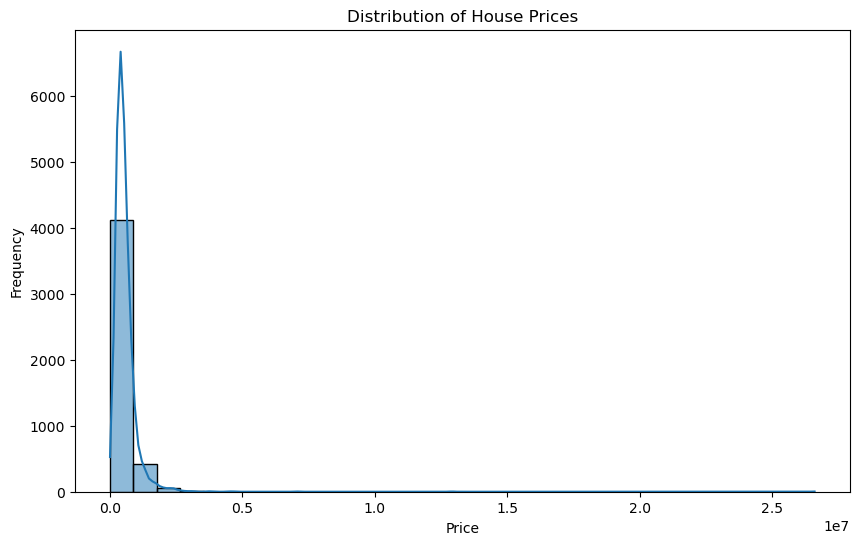

In [31]:
#1.Price Distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30,kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

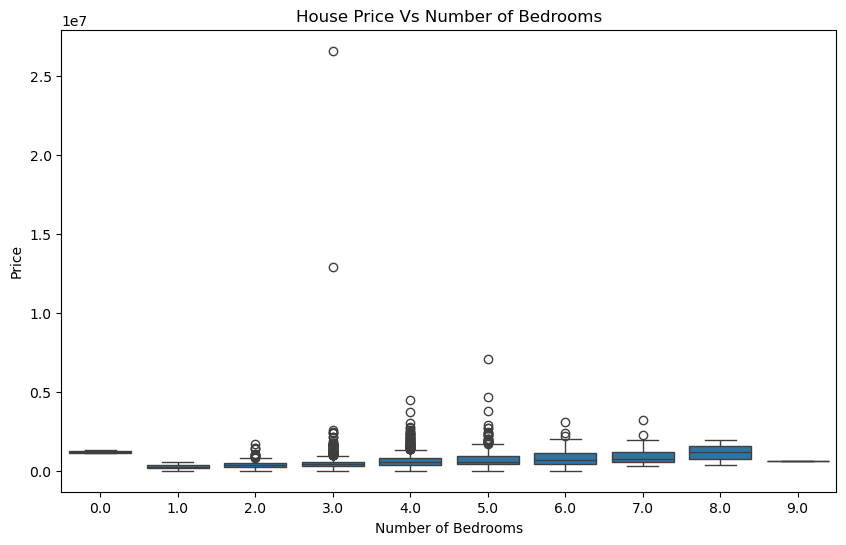

In [35]:
#2.Price Vs Bedrooms
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('House Price Vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

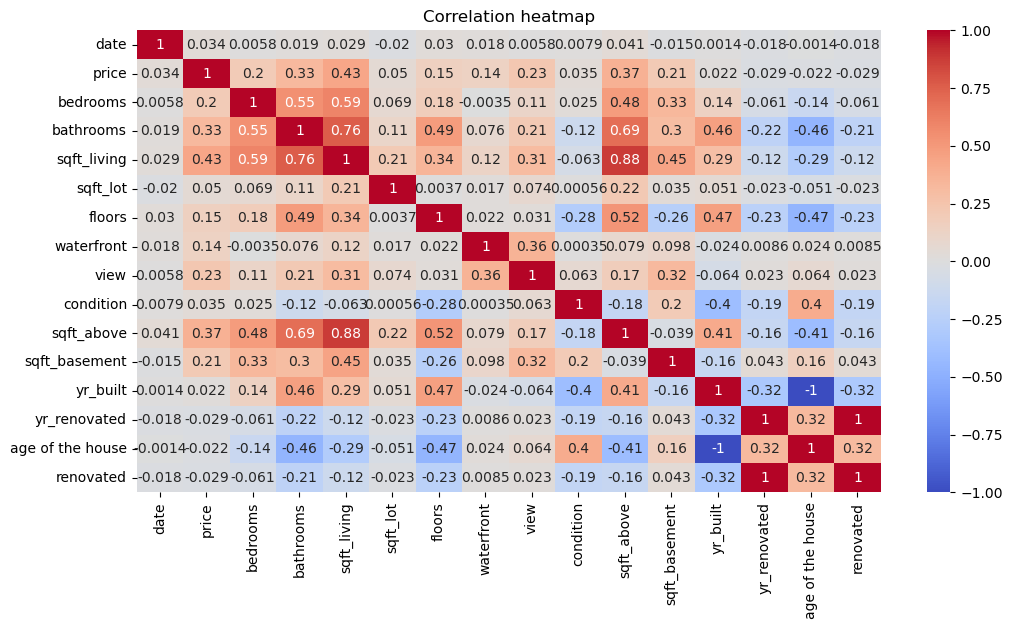

In [37]:
#3.Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

# Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
 #Features and Targets
X=df.drop(['date','price'], axis=1)
y=df['price']

#Splitting data inti training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Model Building

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Initializing the model
lr = LinearRegression()

#Fitting the model
lr.fit(X_train, y_train)

#Predictions
y_pred = lr.predict(X_test)

#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

Mean Squared Error: 679343178513.2888
R-Squared: 0.059670131941891635


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Initializing Random Forest Model
rf=RandomForestRegressor(random_state=42)

#Setting up the hyperparameter grid
param_grid = {
    'n_estimators':[100,200,300],    #Number of trees
    'max_depth':[10,20,30],          #Maximum number of trees
    'min_samples_split':[2,5,10],    #Minimum number of samples required to split an internal node
    'min_samples_leaf':[1,2,4],      #Minimum number of samples required at a leaf node
    'bootstrap':[True, False],       #Whether Bootstrap samples are used
    
}

#Initialize GridSearchCV with 5-fold cross validation
grid_search = GridSearchCV(estimator=rf, param_grid = param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

In [60]:
#Fitting the model
grid_search.fit(X_train, y_train)

#Viewing the best parameters
print("Best Parameters forund by GridSearchCV:",grid_search.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters forund by GridSearchCV: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [62]:
#Making the predictions using the best model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

In [64]:
#Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-Squared: {r2_rf}')

Random Forest Mean Squared Error: 678498943028.5673
Random Forest R-Squared: 0.06083870162370608


# Model Evaluation and Visualization

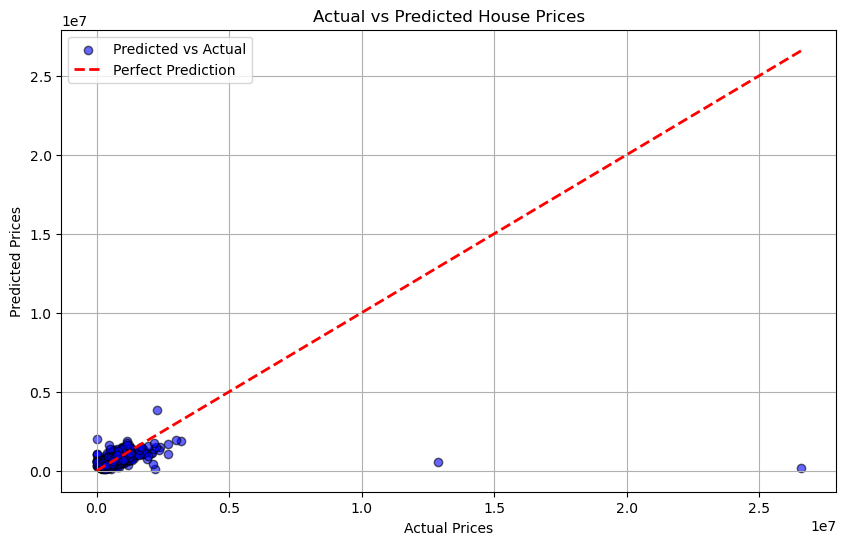

In [67]:
#Actual Vs Predicted Prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6, label='Predicted vs Actual')

#Plot the perfect prediction line (45-Degree line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

#Adding labels and titles
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)

plt.show()

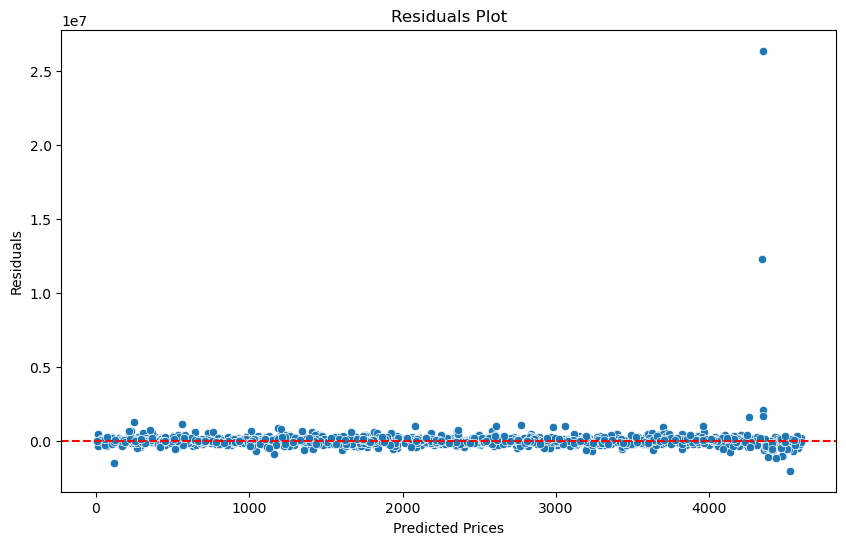

In [71]:
#Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.scatterplot(residuals)
plt.axhline(0, color='red', ls='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

In [77]:
import joblib

#Saving the trained model
joblib.dump(rf,'House Price Model.pkl')

['House Price Model.pkl']

In [79]:
# Create a DataFrame with actual and predicted prices
result_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_rf})

# Save the DataFrame as a CSV file
result_df.to_csv('housepriceprediction.csv', index=False)

print("Predictions have been saved as 'housepriceprediction.csv'")

Predictions have been saved as 'housepriceprediction.csv'
